In [1]:
# circulo ( (cx , cy ) , radio)


import numpy as np

def radios (numberCircles  = 10):
    return 1/np.sqrt(np.arange(1,numberCircles+1))

def generate(numberCircles  = 10):
    return  (np.random.rand(numberCircles,2)-0.5)*8


print (generate())
RADIOS = radios()



[[-1.01887089 -2.50016567]
 [ 2.91259949 -3.9613105 ]
 [ 1.70954935 -3.15586506]
 [-3.39124876  2.15906151]
 [ 2.28463184 -0.26658336]
 [-2.45734645  2.4852543 ]
 [-1.93715716 -1.04543498]
 [-0.43008298 -0.99072345]
 [-2.91279066 -1.02949638]
 [ 2.90574102  1.10265109]]


In [2]:
indiv = generate()
def getRadius(centers:np.array ):

    unit = 1/ np.linalg.norm(centers , axis=1)
    unit  = np.multiply(centers ,  np.array([unit , unit ]).T)
    #print(unit)
    radiuses_duplicate = np.array([RADIOS , RADIOS ]).T
    #print(radiuses_duplicate)
    tangent  =  centers + (np.multiply(unit , radiuses_duplicate) )
    #print("tgm", tangent)
    return   np.linalg.norm(tangent, axis=1)



<Figure size 450x450 with 0 Axes>

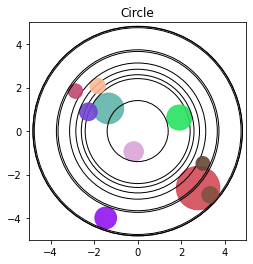

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random 


figure(figsize=(5, 5), dpi=90)



def plotCircles(centers):
    figure, axes = plt.subplots()
    tangets = getRadius(centers)
    #print(tangets)
    for i in range(len(RADIOS)):
        draw_circle = plt.Circle(tuple(centers[i]), RADIOS[i],alpha = 0.9 , color= [random.random(),random.random(),random.random()])
        draw_circle_t = plt.Circle((0,0), tangets[i] , color= [0,0,0],fill=False )
        axes.add_artist(draw_circle)
        axes.add_artist(draw_circle_t)
    ax = plt.gca()

    limits= 5
    ax.set_xlim([-limits, limits])
    ax.set_ylim([-limits, limits])
    ax.set_aspect(1)
    plt.title('Circle')
    plt.show()

cnt = generate()

plotCircles(cnt.tolist() )


In [4]:
def checkSolapamiento(centers):
    for i in range (len(centers)):
        for j in range (i+1,len(centers)):
            #print("Comparing ci :", centers[i]) 
            #print("Comparing cj :", centers[j])
            if (np.linalg.norm(centers[i] - centers[j]) < RADIOS[i]+ RADIOS[j]):
                return True
    return False


In [5]:
checkSolapamiento( np.array([[10,10],[0,0],[0,4]]) )
checkSolapamiento( np.array([[-10,-10],[0,0],[0,4]]) )
print(checkSolapamiento( np.array([[-0.9,0],[0,0],[0,4]]) ))
checkSolapamiento( np.array([[10,10],[0,0],[0,4]]) )
checkSolapamiento( np.array([[10,10],[0,0],[0,4]]) )




True


False

In [6]:


def fitness (individuo ):
    #r , cnt
    return 10000000.0 if checkSolapamiento(individuo) else max(getRadius(individuo)) 


def sortBy(a : list , b : list , mayoresPrimero = True):
    pares  =  [ (ai , bi) for ai,bi in zip(a,b)]
    ordenados = sorted(pares , key = lambda x : x[1], reverse=mayoresPrimero)
    return  [x[0] for x  in ordenados]


def reproducir(seta:np.array , setb:np.array):
    point = random.randint(1, len(seta) - 2)
    #print(point)
    new1 = np.concatenate( (seta[:point], setb[point:]))
    return new1


print(reproducir( np.array([[0,0],[0,0],[0,0],[0,0]]) ,np.array([[1,1],[1,1],[1,1],[1,1]]) ))


def cruzamiento (poblacion:list, cantidadDeHijos= 16):
    pop =  sortBy(poblacion , [fitness(ind) for ind  in poblacion]  ,mayoresPrimero=False)  
    pop= pop[:cantidadDeHijos]
    #print ("Pob" , len (poblacion))
    #print ("-------------------")
    for i in range(len(poblacion )-2):
        pop.append( reproducir(poblacion[i] , poblacion[i+1]))
    return pop

def mutar (indiv:list, rndstep = 0.5):
    punto = random.randint(0, len(indiv) -1)
    mutated = np.concatenate ((indiv[:punto] ,indiv[punto] + (np.random.rand(1,2) -0.5)*rndstep , indiv[punto+1:]) )
    return mutated



def mutarPob(poblacion , ratioDeMutacion = 0.5,step = 0.5):
    poblacionMutada= []
    for invividuo in poblacion:
        # solo un porcentaje% se muta
        if (random.random() < ratioDeMutacion):
            poblacionMutada.append(mutar(invividuo, rndstep = step))
        else:
            poblacionMutada.append(invividuo)
    return poblacionMutada

def seleccionarSiguientes(poblacion ,f , cantidad):
    ftns = [f(e) for e in poblacion]
    poblacion = sortBy(poblacion ,ftns ,mayoresPrimero=False)

    #print ("All fitness" , ftns)    
    return poblacion[:cantidad]

[[0 0]
 [1 1]
 [1 1]
 [1 1]]


In [7]:
np.concatenate((np.array([1]),np.array([1]),np.array([1])))

array([1, 1, 1])

In [8]:
def Optimizar ( iteraciones):
    tamanio = 40
    poblacion= [ generate() for _ in range(tamanio ) ]
    mutationStep = 0.5
    for it in range (iteraciones):
        
        popblacionEHijos = cruzamiento(poblacion, cantidadDeHijos= tamanio)
        popblacionMutada = mutarPob(popblacionEHijos ,ratioDeMutacion=0.6,step = mutationStep)
        poblacion = seleccionarSiguientes(popblacionMutada,fitness,tamanio)
        if it % 50 == 0 :
            print("Mejor ind iteracion:" , it, "fitness: ", fitness(poblacion[0]))
            plotCircles(poblacion[0])
        if (it > 200): mutationStep = 0.3
        if (it > 750): mutationStep = 0.1



    return poblacion[0]


Mejor ind iteracion: 0 fitness:  4.9335336163533094


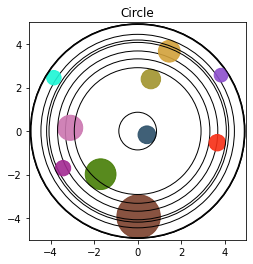

Mejor ind iteracion: 50 fitness:  4.063398485043733


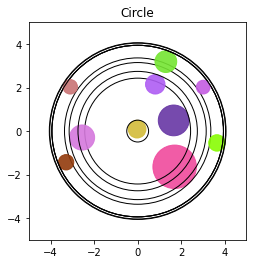

Mejor ind iteracion: 100 fitness:  3.595045435867683


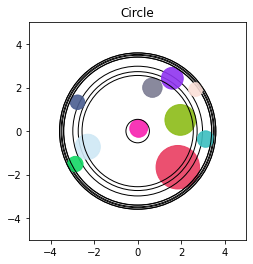

Mejor ind iteracion: 150 fitness:  3.2889948694214337


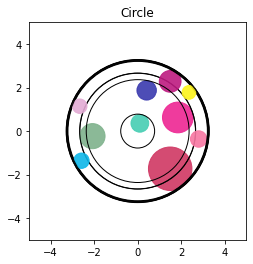

Mejor ind iteracion: 200 fitness:  3.0547557236284724


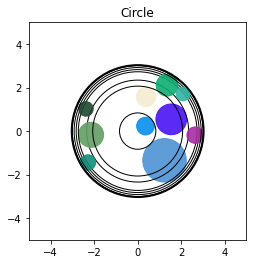

Mejor ind iteracion: 250 fitness:  2.90355044399736


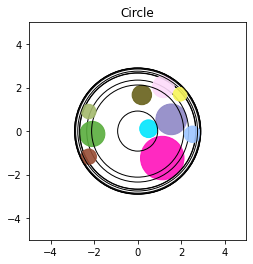

Mejor ind iteracion: 300 fitness:  2.8088896762524467


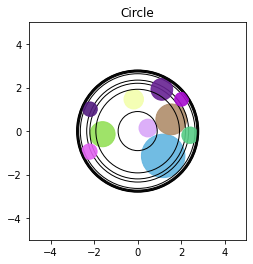

Mejor ind iteracion: 350 fitness:  2.6747200480648425


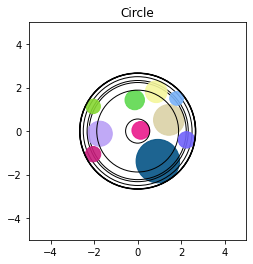

Mejor ind iteracion: 400 fitness:  2.586846370726216


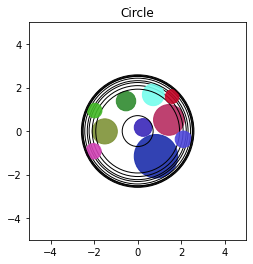

Mejor ind iteracion: 450 fitness:  2.5148898430073796


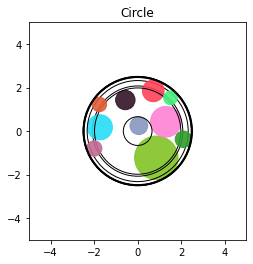

Mejor ind iteracion: 500 fitness:  2.413305334504276


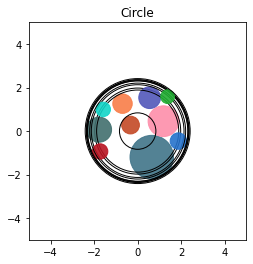

Mejor ind iteracion: 550 fitness:  2.3289525383699323


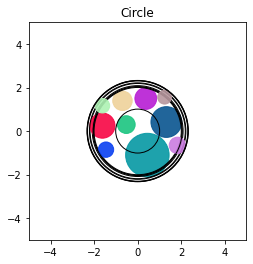

Mejor ind iteracion: 600 fitness:  2.234247467989799


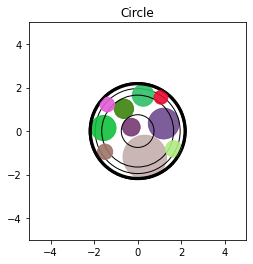

Mejor ind iteracion: 650 fitness:  2.176064814315559


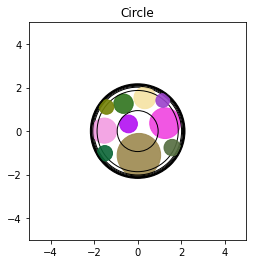

Mejor ind iteracion: 700 fitness:  2.1459027990261244


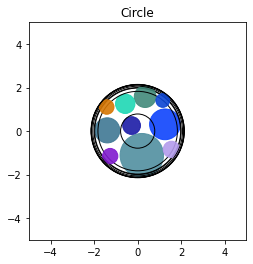

Mejor ind iteracion: 750 fitness:  2.124455336324352


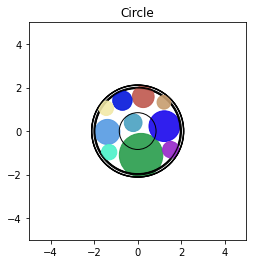

Mejor ind iteracion: 800 fitness:  2.077994084778178


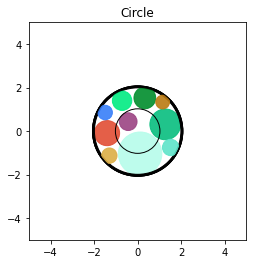

Mejor ind iteracion: 850 fitness:  2.060809245465004


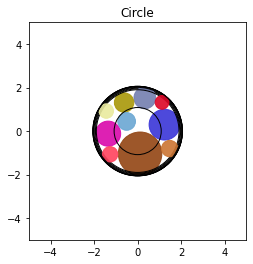

Mejor ind iteracion: 900 fitness:  2.0565400953978394


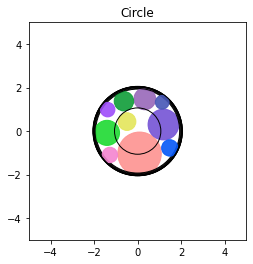

Mejor ind iteracion: 950 fitness:  2.048988346467128


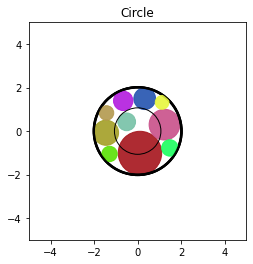

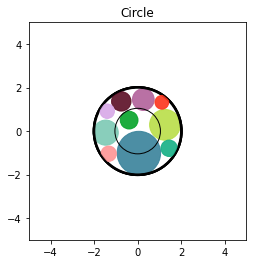

In [9]:
opt = Optimizar(1000)
plotCircles(opt)

In [12]:
print(opt)
fitness(opt)

[[ 0.05466566 -1.01084804]
 [ 1.25566797  0.28755531]
 [-1.46866513 -0.07233956]
 [ 0.26001615  1.44967288]
 [-0.75262526  1.36590216]
 [-0.39247674  0.50388502]
 [ 1.44699804 -0.79047616]
 [-1.33337736 -1.04069055]
 [-1.40057946  0.91401534]
 [ 1.11202903  1.32368781]]


2.0477958779531784